In [2]:
# # some statements to help run code on a computing platform
# # unzip folder
# !unzip "./data.zip"

# # install requirements
# !pip install -r requirements.txt
# !pip install --upgrade tables

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Exploration

In [49]:
def read_file(subject_id):
    hdfs = pd.HDFStore('./data/subject_{}.h5'.format(subject_id))
    subject_data = pd.merge(hdfs['/Heart_Rate'], hdfs['/Acceleration'], how = 'outer', left_index = True, right_index = True)
    subject_data = pd.merge(subject_data, hdfs['/Sleep_Stages'], how = 'outer', left_index = True, right_index = True)
    meta = hdfs['/Profile']
    subject_data['age'] = meta['age'].values[0]
    subject_data['gender'] = meta['gender'].values[0]
    subject_data['weight'] = meta['weight'].values[0]
    subject_data['height'] = meta['height'].values[0]
        
    return subject_data

In [98]:
df_0 = read_file(0)
df_1 = read_file(1)
df_2 = read_file(2)

In [51]:
# what does the dataframe look like for person 0?
df_0.head()

,heart_rate,heart_rate_conf,acc,sleep_tokens,age,gender,weight,height
1480413600960000000,68.0,56.0,0.021978,NaN,31,female,70,176
1480413601960000000,68.0,56.0,0.020255,NaN,31,female,70,176
1480413602960000000,69.0,57.0,0.018503,NaN,31,female,70,176
1480413603960000000,69.0,58.0,0.018393,NaN,31,female,70,176
1480413604960000000,69.0,60.0,0.019204,NaN,31,female,70,176


In [52]:
# any fluctuation in weight?
print(df_0.weight.unique())
print(df_1.weight.unique())
print(df_2.weight.unique())

[70]
[55]
[134]


In [61]:
# print information summary for all candidates
print("Info about person 0\n")
print("Person's age:", df_0.age.unique()[0])
print("Person's gender:", df_0.gender.unique()[0])
print("Person's height:", df_0.height.unique()[0])
print("Person's weight:", df_0.weight.unique()[0])
print("Person's average heart rate (BPM):", df_0[df_0.heart_rate_conf>90].heart_rate.mean())
print("Person's average activity level:", df_0.acc.mean())
print("Data recorded for {} days".format(len(df_0)/(60*60*24)))

Info about person 0

Person's age: 31
Person's gender: female
Person's height: 176
Person's weight: 70
Person's average heart rate (BPM): 50.11531256504544
Person's average activity level: 0.04410056004359571
Data recorded for 6.536481481481482 days


In [59]:
print("Info about person 1\n")
print("Person's age:", df_1.age.unique()[0])
print("Person's gender:", df_1.gender.unique()[0])
print("Person's height:", df_1.height.unique()[0])
print("Person's weight:", df_1.weight.unique()[0])
print("Person's average heart rate (BPM):", df_1[df_1.heart_rate_conf>90].heart_rate.mean())
print("Person's average activity level:", df_1.acc.mean())
print("Data recorded for {} days".format(len(df_2)/(60*60*24)))

Info about person 1

Person's age: 45
Person's gender: male
Person's height: 163
Person's weight: 55
Person's average heart rate: 69.49086273600884
Person's average activity level: 0.054543958085801335
Data recorded for 6.358587962962963 days


In [60]:
print("Info about person 2\n")
print("Person's age:", df_2.age.unique()[0])
print("Person's gender:", df_2.gender.unique()[0])
print("Person's height:", df_2.height.unique()[0])
print("Person's weight:", df_2.weight.unique()[0])
print("Person's average heart rate (BPM):", df_2[df_2.heart_rate_conf>90].heart_rate.mean())
print("Person's average activity level:", df_2.acc.mean())
print("Data recorded for {} days".format(len(df_2)/(60*60*24)))

Info about person 2

Person's age: 49
Person's gender: male
Person's height: 179
Person's weight: 134
Person's average heart rate: 86.53492314647377
Person's average activity level: 0.041286604600001095
Data recorded for 6.358587962962963 days


In [179]:
# collect profile information for all candidates
weight = [df_0.weight.unique()[0], df_1.weight.unique()[0], df_2.weight.unique()[0]]
height = [df_0.height.unique()[0], df_1.height.unique()[0], df_2.height.unique()[0]]
age = [df_0.age.unique()[0], df_1.age.unique()[0], df_2.age.unique()[0]]
gender = [df_0.gender.unique()[0], df_1.gender.unique()[0], df_2.gender.unique()[0]]

#### For this dataset, there seems to be no change in age or fluctuation in weight. Obviously, gender is fixed and height will not change since age> 30. Therefore, this information must have come from their profile when it was setup. It is possible that there could be some change in weight over time and this could have some influence on fitness scores. For now, we keep that aside because we are looking at data over seven days only. The time series measurements are heart_rate, acceleration and sleep_tokens. These measurements are recorded for approximately 7 days. Let take a look at these for each person individually.

Text(0,0.5,'Sleep stages')

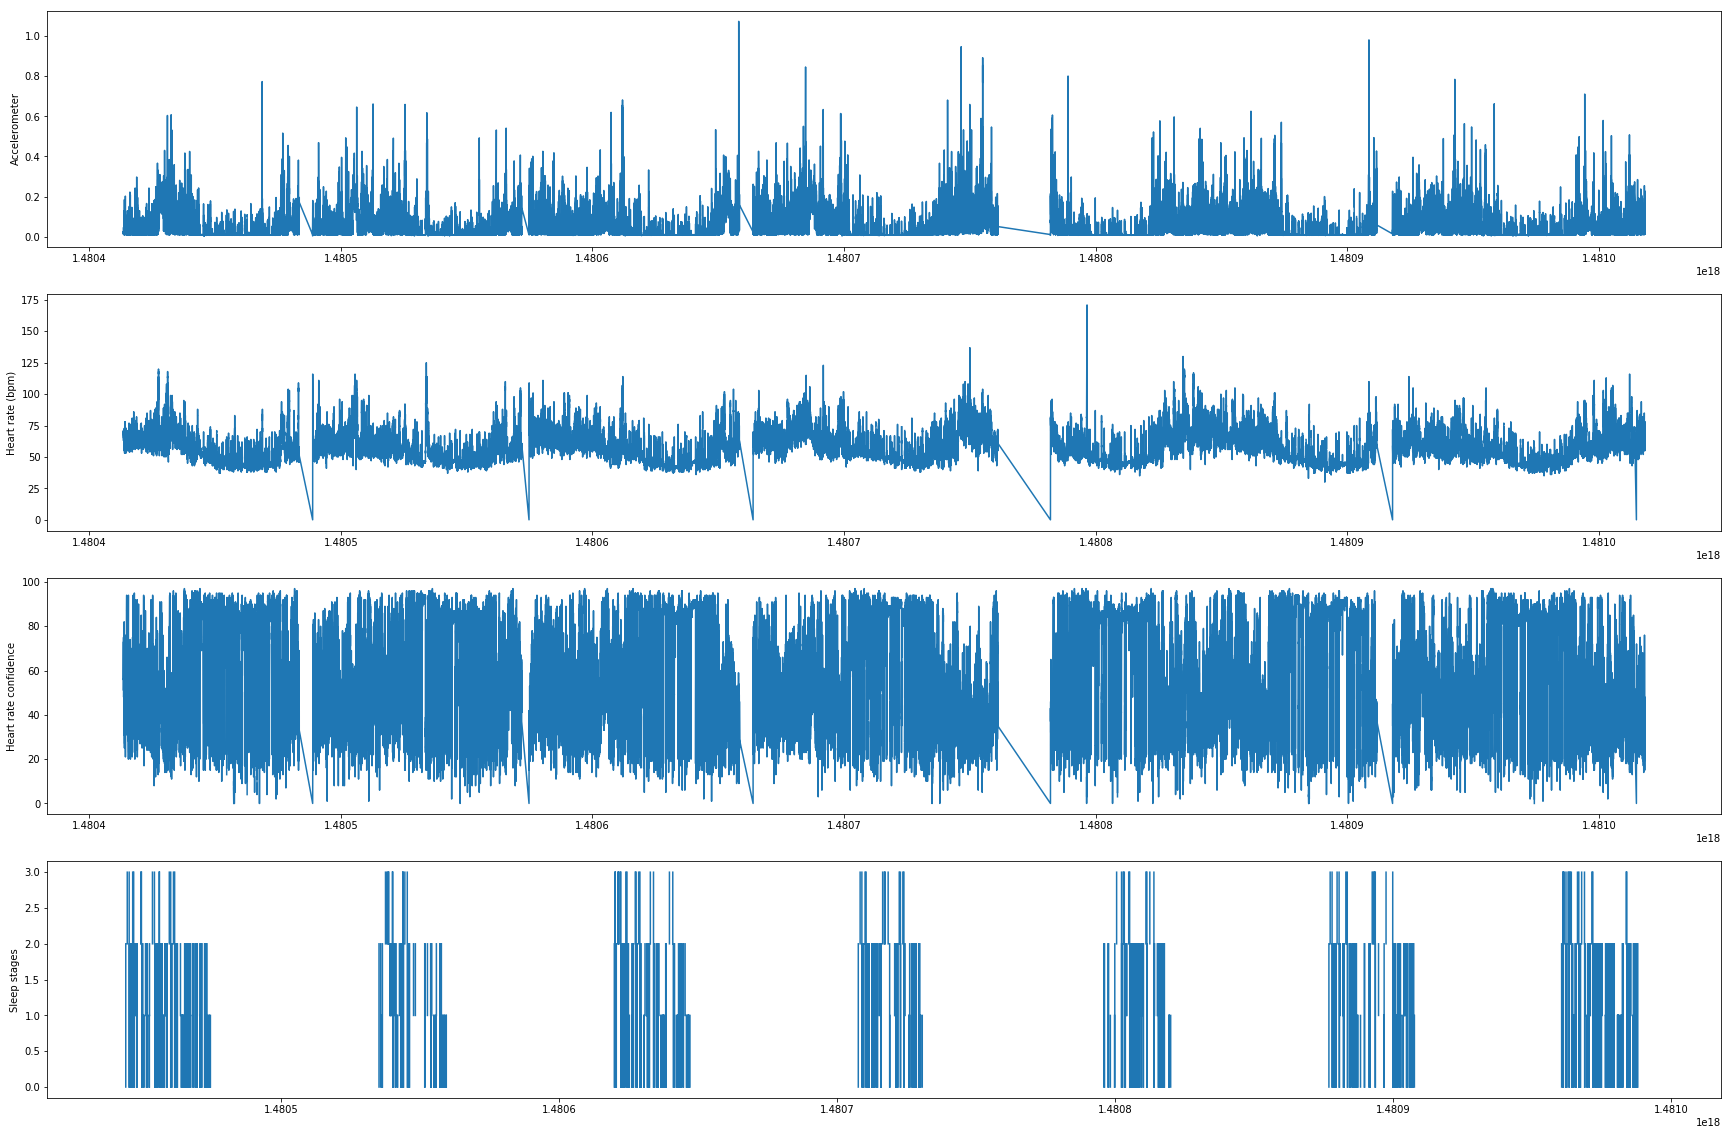

In [ ]:
#plots for participant_0 
fig = plt.subplots(figsize = (30,20))
plt.subplot(4,1,1) 
plt.plot(df_0['acc'])
plt.ylabel('Accelerometer')

plt.subplot(4,1,2) 
plt.plot(df_0['heart_rate'])
plt.ylabel('Heart rate (bpm)')

plt.subplot(4,1,3) 
plt.plot(df_0['heart_rate_conf'])
plt.ylabel('Heart rate confidence')

tmp_sleep_stages = df_0[['sleep_tokens']].copy()
tmp_sleep_stages[tmp_sleep_stages == 'sleep_wake_start'] = 0
tmp_sleep_stages[tmp_sleep_stages == 'sleep_wake_stop'] = 0
tmp_sleep_stages[tmp_sleep_stages == 'sleep_rem_start'] = 1
tmp_sleep_stages[tmp_sleep_stages == 'sleep_rem_stop'] = 1
tmp_sleep_stages[tmp_sleep_stages == 'sleep_light_start'] = 2
tmp_sleep_stages[tmp_sleep_stages == 'sleep_light_stop'] = 2
tmp_sleep_stages[tmp_sleep_stages == 'sleep_deep_start'] = 3
tmp_sleep_stages[tmp_sleep_stages == 'sleep_deep_stop'] = 3
tmp_sleep_stages_0 = tmp_sleep_stages

plt.subplot(4,1,4) 
plt.plot( tmp_sleep_stages['sleep_tokens'])
plt.ylabel('Sleep stages')

Text(0,0.5,'Sleep stages')

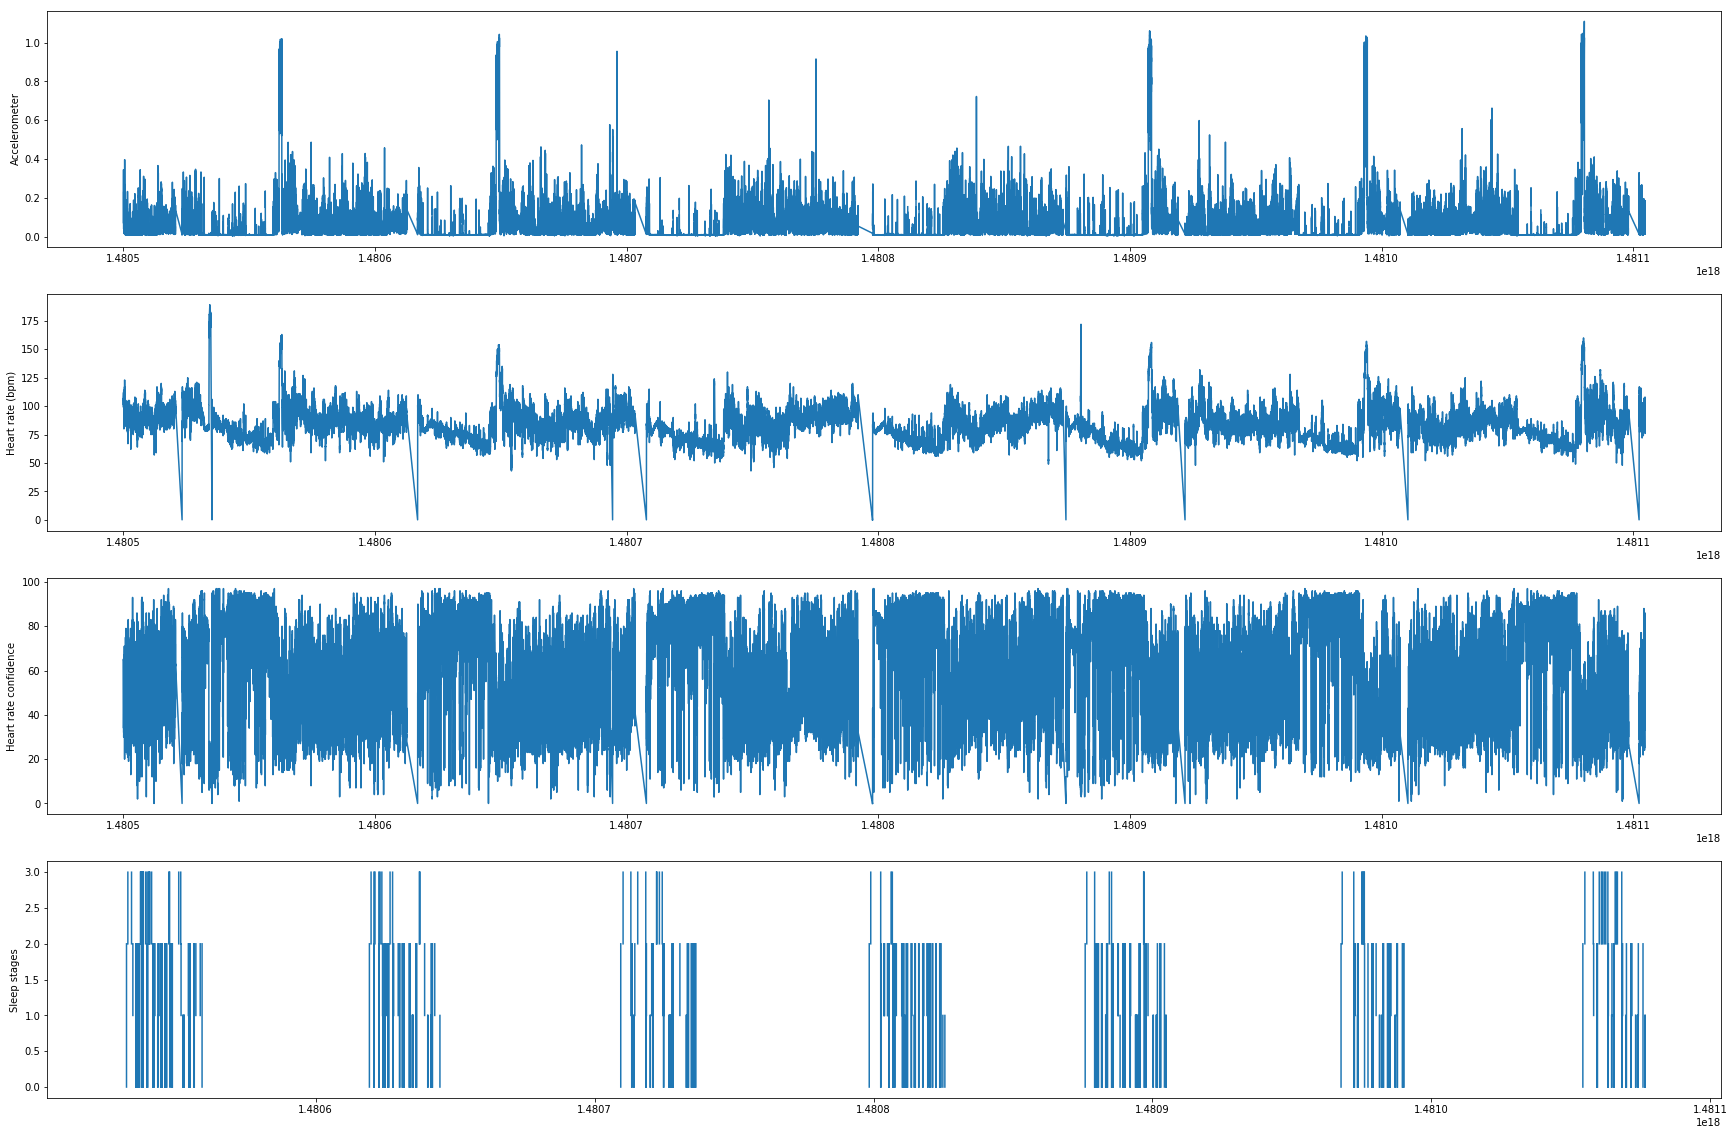

In [ ]:
#plots for participant_1 
fig = plt.subplots(figsize = (30,20))
plt.subplot(4,1,1) 
plt.plot(df_1['acc'])
plt.ylabel('Accelerometer')

plt.subplot(4,1,2) 
plt.plot(df_1['heart_rate'])
plt.ylabel('Heart rate (bpm)')

plt.subplot(4,1,3) 
plt.plot(df_1['heart_rate_conf'])
plt.ylabel('Heart rate confidence')

tmp_sleep_stages = df_1[['sleep_tokens']].copy()
tmp_sleep_stages[tmp_sleep_stages == 'sleep_wake_start'] = 0
tmp_sleep_stages[tmp_sleep_stages == 'sleep_wake_stop'] = 0
tmp_sleep_stages[tmp_sleep_stages == 'sleep_rem_start'] = 1
tmp_sleep_stages[tmp_sleep_stages == 'sleep_rem_stop'] = 1
tmp_sleep_stages[tmp_sleep_stages == 'sleep_light_start'] = 2
tmp_sleep_stages[tmp_sleep_stages == 'sleep_light_stop'] = 2
tmp_sleep_stages[tmp_sleep_stages == 'sleep_deep_start'] = 3
tmp_sleep_stages[tmp_sleep_stages == 'sleep_deep_stop'] = 3
tmp_sleep_stages_1 = tmp_sleep_stages


plt.subplot(4,1,4) 
plt.plot( tmp_sleep_stages['sleep_tokens'])
plt.ylabel('Sleep stages')

Text(0,0.5,'Sleep stages')

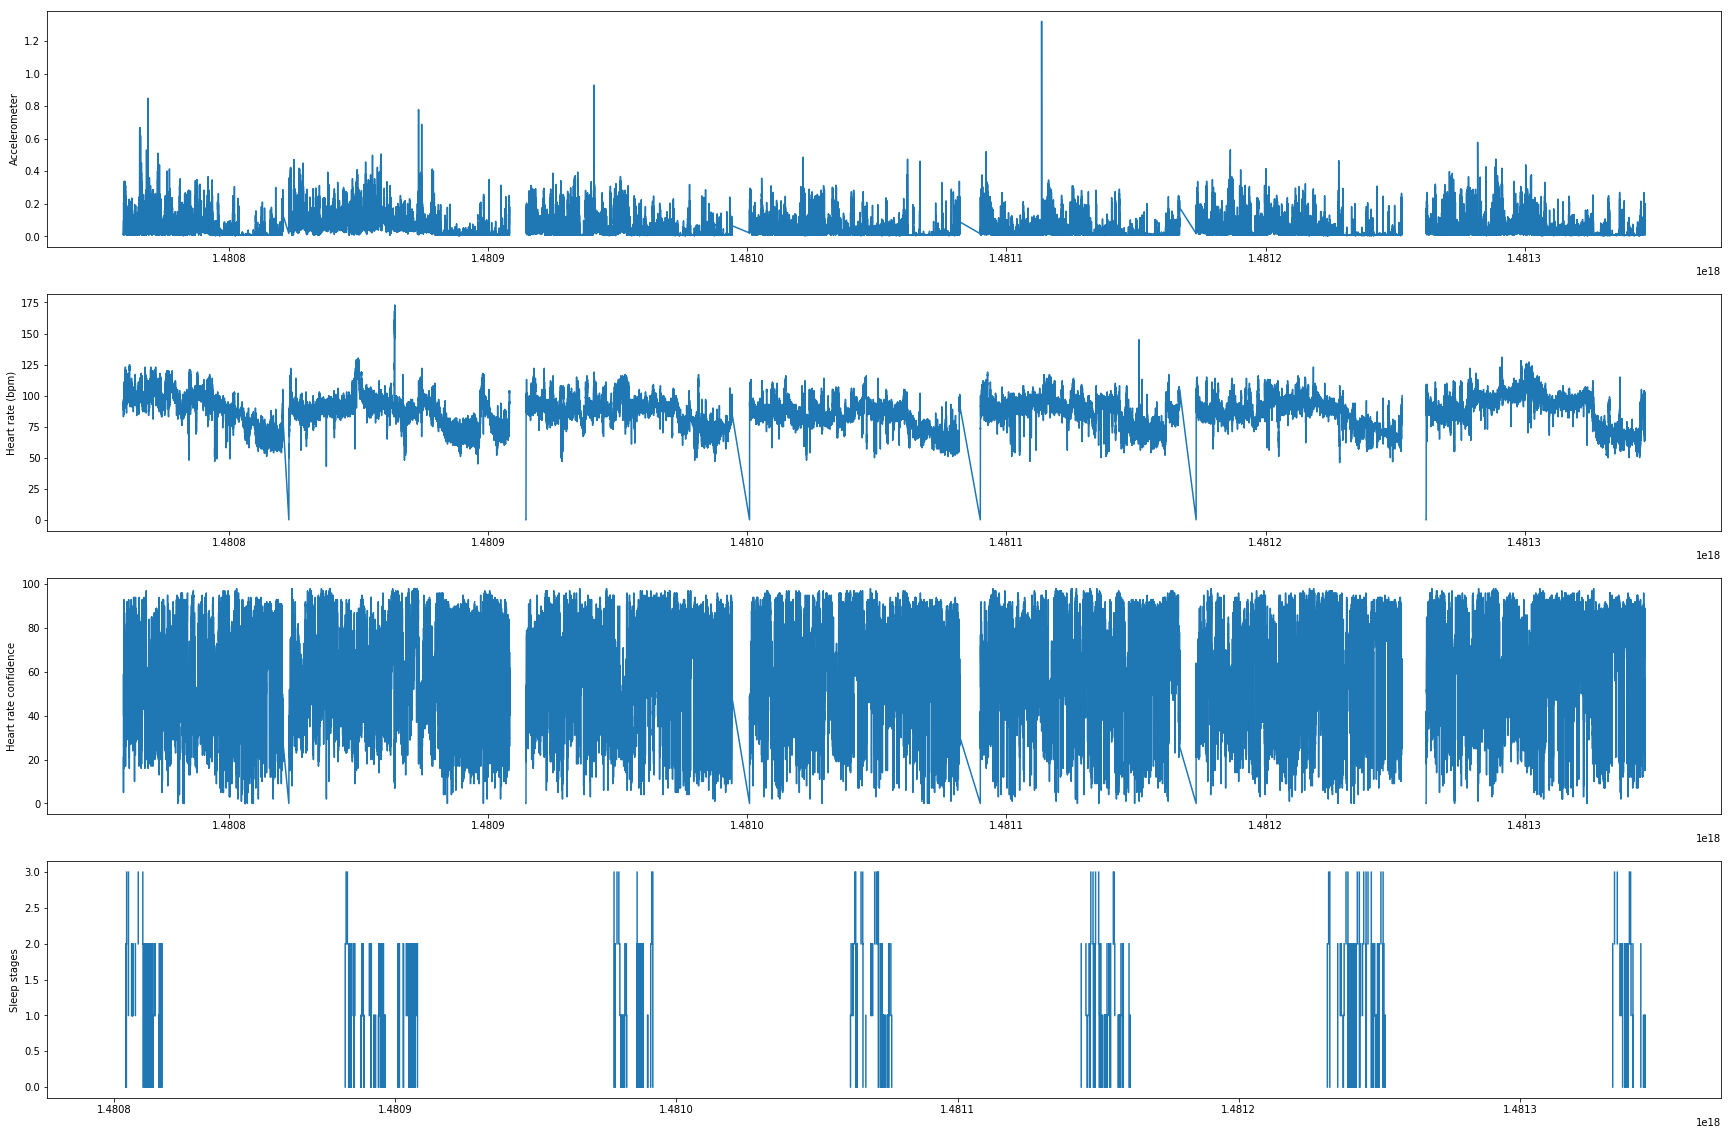

In [ ]:
#plots for participant_2
fig = plt.subplots(figsize = (30,20))
plt.subplot(4,1,1) 
plt.plot(df_2['acc'])
plt.ylabel('Accelerometer')

plt.subplot(4,1,2) 
plt.plot(df_2['heart_rate'])
plt.ylabel('Heart rate (bpm)')

plt.subplot(4,1,3) 
plt.plot(df_2['heart_rate_conf'])
plt.ylabel('Heart rate confidence')

tmp_sleep_stages = df_2[['sleep_tokens']].copy()
tmp_sleep_stages[tmp_sleep_stages == 'sleep_wake_start'] = 0
tmp_sleep_stages[tmp_sleep_stages == 'sleep_wake_stop'] = 0
tmp_sleep_stages[tmp_sleep_stages == 'sleep_rem_start'] = 1
tmp_sleep_stages[tmp_sleep_stages == 'sleep_rem_stop'] = 1
tmp_sleep_stages[tmp_sleep_stages == 'sleep_light_start'] = 2
tmp_sleep_stages[tmp_sleep_stages == 'sleep_light_stop'] = 2
tmp_sleep_stages[tmp_sleep_stages == 'sleep_deep_start'] = 3
tmp_sleep_stages[tmp_sleep_stages == 'sleep_deep_stop'] = 3
tmp_sleep_stages_2 = tmp_sleep_stages

plt.subplot(4,1,4) 
plt.plot( tmp_sleep_stages['sleep_tokens'])
plt.ylabel('Sleep stages')

##### In order to evalute an accurate fitness score, we must use good quality data. From the graphs, here are some observations I made. Importantly, some of these have the potential to affect fitness scores if not handled properly:


* Accelerometer readings and heart rate measurements show the presence of outliers which we should consider removing during cleaning.
*   Confidence values for heart rate can be very low, so it would be a good idea to use heart rate data associated with higher confidence values.
*   Sleep stages are of four types: deep sleep, REM, light sleep and awake. We must understand how each stage constributes to fitness to weight its relative importance. Also, all individuals seem to have rested all seven nights, some better than others.



In [ ]:
df_0.head()

,heart_rate,heart_rate_conf,acc,sleep_tokens,age,gender,weight,height
1480413600960000000,68.0,56.0,0.021978,NaN,31,female,70,176
1480413601960000000,68.0,56.0,0.020255,NaN,31,female,70,176
1480413602960000000,69.0,57.0,0.018503,NaN,31,female,70,176
1480413603960000000,69.0,58.0,0.018393,NaN,31,female,70,176
1480413604960000000,69.0,60.0,0.019204,NaN,31,female,70,176


In [ ]:
stage = np.nan
for i in len(df_0):
  if df_0.iloc[i, "sleep_tokens"]:
    stage = df_0.iloc[i, "sleep_tokens"]
  df_0.iloc[i, "sleep_tokens"] = stage

### Data reduction and feature engineering

In [ ]:
# generate features that can be used to characterize a person's fitness:
# here I build some features indicative of a person's fitness based on measurmeents from the data stream

In [99]:
# calculate resting heart rate
# resting heart rate can be calculated when a person wakes up in the morning
# take 80 as the confidence threshold for heart rate measurements

# person 0
resting_heart_rate = []
resting_rate, n = 0, 0
n = 0
for i in range(0,int(len(df_0)),5):
  if df_0.iloc[i]["sleep_tokens"]=="sleep_wake_start":
    rhr = [df_0.iloc[i+k]["heart_rate"] for k in range(2,60) if df_0.iloc[i+k]["heart_rate_conf"]>80] # mean over 60 secs after a person wakes up
    if rhr:
      resting_rate += np.mean(rhr)
      n+=1
resting_heart_rate.append(resting_rate/n)

# person 1
resting_rate, n = 0, 0
n = 0
for i in range(0,int(len(df_1)),5):
  if df_1.iloc[i]["sleep_tokens"]=="sleep_wake_start":
    rhr = [df_1.iloc[i+k]["heart_rate"] for k in range(2,60) if df_1.iloc[i+k]["heart_rate_conf"]>80]
    if rhr: 
      resting_rate += np.mean(rhr)
      n+=1
resting_heart_rate.append(resting_rate/n)

# person 2
resting_rate, n = 0, 0
n = 0
for i in range(0,int(len(df_2)),5):
  if df_2.iloc[i]["sleep_tokens"]=="sleep_wake_start":
    rhr = [df_2.iloc[i+k]["heart_rate"] for k in range(2,60) if df_2.iloc[i+k]["heart_rate_conf"]>80]
    if rhr:
      resting_rate += np.mean(rhr)
      n+=1
resting_heart_rate.append(resting_rate/n)

In [100]:
# what are the resting heart rates?
resting_heart_rate

[45.973994373199986, 70.29241392117822, 70.6583024749939]

Person 0 seems to have a low heart rate which is indicative of good fitness. Persons 1 and 2 have heart rates close together although Person 2 has a slightly higher resting heart rate. To rank their fitness based on resting heart rates: Person 0>1>2.

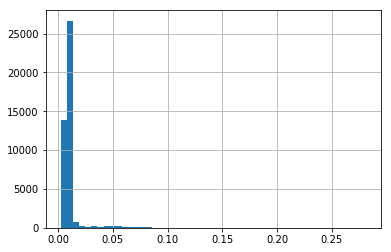

In [ ]:
# Accelerometer
# visualizing data
df_0.acc.hist(bins=50)

In [238]:
# seem to be some high measurements which could be outliers?

0.010887217464299569

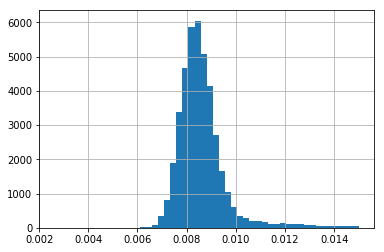

In [ ]:
# removing outliers
df_0[df_0.acc<0.015].acc.hist(bins=50)
df_0.acc.mean()

0.009443219080394343

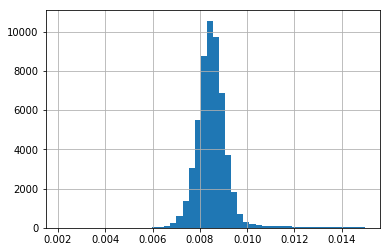

In [ ]:
df_1[df_1.acc<0.015].acc.hist(bins=50)
df_1.acc.mean()

0.018277158647610186

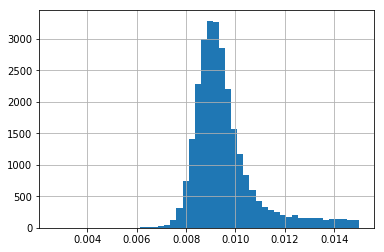

In [ ]:
df_2[df_2.acc<0.015].acc.hist(bins=50)
df_2.acc.mean()

In [ ]:
# the average activity of person 0 < person 1 < person 2

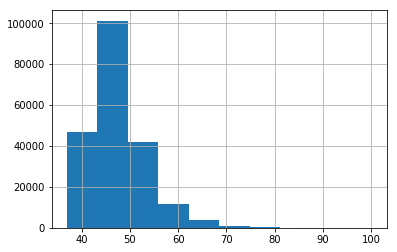

In [251]:
# heart rate
# filter to remove heart rates where confidence is < 80
df_0.heart_rate[df_0.heart_rate_conf>80].hist()

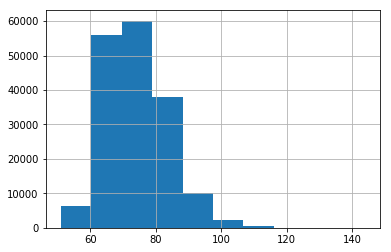

In [250]:
df_1.heart_rate[df_1.heart_rate_conf>80].hist()

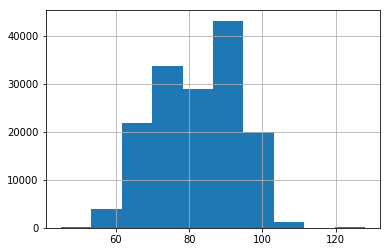

In [252]:
df_2.heart_rate[df_2.heart_rate_conf>80].hist()

In [247]:
# print average heart_rates
print(df_0.heart_rate[df_0.heart_rate_conf>80].mean())
print(df_1.heart_rate[df_1.heart_rate_conf>80].mean())
print(df_2.heart_rate[df_2.heart_rate_conf>80].mean())

47.560198423432126
73.90957425313898
82.14318814019701


In [253]:
# BMI
bmi = []
for i in range(len(weight)):
  bmi.append(weight[i]/(height[i]*height[i]*0.01*0.01))

In [255]:
# What are their BMIs?
print(bmi)

[22.59814049586777, 20.70081674131507, 41.821416310352355]


In [ ]:
# The BMI chart (ref - https://www.mealpro.net/blog/what-is-the-bmi-calculator/), suggests that Persons 0 and 1 are "healthy" whereas Person 2 is obese.
# Therefore,fitness levels of Persons 0 and 1 > Person 2

In [ ]:
# VO2 max is a measure of fitness with higher VO2 max values indicating higher fitness levels 

In [256]:
# approximate VO2 max based on heart rates
# VO2max = 15.3 x (MHR/RHR) ref-http://www.shapesense.com/fitness-exercise/calculators/vo2max-calculator.shtml
vo2_max = []
for i in range(len(resting_heart_rate)):
  MHR = 208 - (0.7*age[i])
  vo2_max.append(15.3*(MHR)/resting_heart_rate[i])

vo2_max

[62.000051091092544, 38.41737464057111, 37.61214049743882]

In [ ]:
# according to the VO2 max values: fitness levels of person 0>1>2

In [177]:
# average heart rates at different levels of activity (1, 2 and 3)
# level 1: acc reading is between 0.15 and 0.2
# level 2: acc reading is between 0.2 and 0.25
# level 3: acc reading is between 0.25 and 0.3
# activity is measured based on motion detected by the accelerometer
# again, we collect heart rates associated with confidence values > 80 within those acc ranges (depending on acitivty levels)

# activity level 1
lvl1 = []
lvl1.append(df_0[(df_0.heart_rate_conf>80)&(df_0.acc>0.15)&(df_0.acc<0.2)].heart_rate.mean())
lvl1.append(df_1[(df_1.heart_rate_conf>80)&(df_1.acc>0.15)&(df_1.acc<0.2)].heart_rate.mean())
lvl1.append(df_2[(df_2.heart_rate_conf>80)&(df_2.acc>0.15)&(df_2.acc<0.2)].heart_rate.mean())

# activity level 2
lvl2 = []
lvl2.append(df_0[(df_0.heart_rate_conf>80)&(df_0.acc>0.2)&(df_0.acc<0.25)].heart_rate.mean())
lvl2.append(df_1[(df_1.heart_rate_conf>80)&(df_1.acc>0.2)&(df_1.acc<0.25)].heart_rate.mean())
lvl2.append(df_2[(df_2.heart_rate_conf>80)&(df_2.acc>0.2)&(df_2.acc<0.25)].heart_rate.mean())

# activity level 3
lvl3 = []
lvl3.append(df_0[(df_0.heart_rate_conf>80)&(df_0.acc>0.25)&(df_0.acc<0.3)].heart_rate.mean())
lvl3.append(df_1[(df_1.heart_rate_conf>80)&(df_1.acc>0.25)&(df_1.acc<0.3)].heart_rate.mean())
lvl3.append(df_2[(df_2.heart_rate_conf>80)&(df_2.acc>0.25)&(df_2.acc<0.3)].heart_rate.mean())

In [178]:
print("level 1:", lvl1)
print("level 2:", lvl2)
print("level 3:", lvl3)

level 1: [61.688741721854306, 100.32065217391305, 96.22448979591837]
level 2: [60.62608695652174, 107.67630057803468, 108.87096774193549]
level 3: [60.0, 112.5, 102.58333333333333]


In [ ]:
# we see that average heart rates increase going from level 1 to level 3, due to an increase in motion owing to the level of intensity
# again, fitness levels of person 0>1>2

In [257]:
VO2max_lvl1, VO2max_lvl2, VO2max_lvl3 = [], [], []
for i in range(len(gender)):
  if gender[i]=="male": 
    VO2max_lvl1.append(111.33 - 0.42*lvl1[i])
    VO2max_lvl2.append(111.33 - 0.42*lvl2[i])
    VO2max_lvl3.append(111.33 - 0.42*lvl3[i])

  elif gender[i]=="female": 
    VO2max_lvl1.append(65.81 - 0.1847*lvl1[i])
    VO2max_lvl2.append(65.81 - 0.1847*lvl2[i])
    VO2max_lvl3.append(65.81 - 0.1847*lvl3[i])

In [258]:
# acitvity level 1
print(VO2max_lvl1)
# activity level 2
print(VO2max_lvl2)
# activity level 3
print(VO2max_lvl3)

[54.416089403973515, 69.19532608695653, 70.91571428571427]
[54.612361739130435, 66.10595375722544, 65.60419354838709]
[54.728, 64.08, 68.245]


In [ ]:
# the VO2 max here indicates an opposite trend (than that noted above) which could mean that the formula is not right
# trying V)@ max calculation another way -

In [259]:
# formula ref - http://www.shapesense.com/fitness-exercise/calculators/vo2max-calculator.shtml
# ignoring time in formula since we are using average heart rate readings == only approximate!

VO2max_lvl1, VO2max_lvl2, VO2max_lvl3 = [], [], []
for i in range(len(gender)):
  if gender[i]=="male": g = 1
  else: g = 0
  VO2max_lvl1.append(132.853 - 0.0769*weight[i] - 0.3877*age[i] + 6.315 - 0.1565*lvl1[1])
  VO2max_lvl2.append(132.853 - 0.0769*weight[i] - 0.3877*age[i] + 6.315 - 0.1565*lvl2[1])
  VO2max_lvl3.append(132.853 - 0.0769*weight[i] - 0.3877*age[i] + 6.315 - 0.1565*lvl3[1])

In [260]:
# acitvity level 1
print(VO2max_lvl1)
# activity level 2
print(VO2max_lvl2)
# activity level 3
print(VO2max_lvl3)

[106.06611793478262, 101.79181793478261, 94.16591793478263]
[104.91495895953759, 100.64065895953757, 93.01475895953759]
[104.16005000000001, 99.88575, 92.25985000000001]


In [ ]:
# the trend here matches the inferences drawn previously

### Fitness Score Calculation and Comparision

In [ ]:
# features engineered -- BMI, resting heart rate and different types of VO2_max measurements
# assigning relative fitness scores-

In [261]:
# Person 0
print("Fitness factors for Person 0")
print("BMI: ", bmi[0])
print("Resting heart rate :", resting_heart_rate[0])
print("VO2 max (type 1) :", vo2_max[0])
print("VO2 max (type 2) :", (VO2max_lvl1[0],VO2max_lvl2[0],VO2max_lvl3[0]))

Fitness factors for Person 0
BMI:  22.59814049586777
Resting heart rate : 45.973994373199986
VO2 max (type 1) : 62.000051091092544
VO2 max (type 2) : (106.06611793478262, 104.91495895953759, 104.16005000000001)


In [262]:
# Person 1
print("Fitness factors for Person 1")
print("BMI: ", bmi[1])
print("Resting heart rate :", resting_heart_rate[1])
print("VO2 max (type 1) :", vo2_max[1])
print("VO2 max (type 2) :", (VO2max_lvl1[1],VO2max_lvl2[1],VO2max_lvl3[1]))

Fitness factors for Person 1
BMI:  20.70081674131507
Resting heart rate : 70.29241392117822
VO2 max (type 1) : 38.41737464057111
VO2 max (type 2) : (101.79181793478261, 100.64065895953757, 99.88575)


In [263]:
# Person 2
print("Fitness factors for Person 2")
print("BMI: ", bmi[2])
print("Resting heart rate :", resting_heart_rate[2])
print("VO2 max (type 1) :", vo2_max[2])
print("VO2 max (type 2) :", (VO2max_lvl1[2],VO2max_lvl2[2],VO2max_lvl3[2]))

Fitness factors for Person 2
BMI:  41.821416310352355
Resting heart rate : 70.6583024749939
VO2 max (type 1) : 37.61214049743882
VO2 max (type 2) : (94.16591793478263, 93.01475895953759, 92.25985000000001)


In [229]:
def get_BMI_score(BMI):
  
  # ref - https://www.mealpro.net/blog/what-is-the-bmi-calculator/
  if BMI<16: return 8.5 # severe thinness
  if BMI<18.5: return 17 # underweight
  if BMI<25: return 34 # healthy
  if BMI<30: return 17 # overweight
  if BMI>30: return 8.5 # obese

In [235]:
def get_resting_heart_rate_score(rhr,age,gender):
  # ref - https://www.verywellfit.com/resting-heart-rate-3432632

  if age<=35:
    if gender=="male":
      if rhr < 61: return 33
      elif rhr < 70: return 17
      elif rhr < 74: return 8.5
      else: return 4
    
    if gender=="female":
      if rhr < 64: return 33
      elif rhr < 73: return 17
      elif rhr < 78: return 8.5
      else: return 4

  elif age<=45:
    if gender=="male":
      if rhr < 62: return 33
      elif rhr < 70: return 17
      elif rhr < 75: return 8.5
      else: return 4
  
    elif gender=="female":
      if rhr < 64: return 33
      elif rhr < 73: return 17
      elif rhr < 78: return 8.5
      else: return 4

  elif age<=55:
      if gender=="male":
        if rhr < 63: return 33
        elif rhr < 71: return 17
        elif rhr < 76: return 8.5
        else: return 4
    
      elif gender=="female":
        if rhr < 65: return 33
        elif rhr < 73: return 17
        elif rhr < 77: return 8.5
        else: return 4

In [264]:
fitness_score = []

# a fitness score is assigned based on three factors: BMI (34%), resting heart rate (33%) and VO2 Max (33%)
# contributions are assumed to be equal
# BMI and resting heart rate are scored relative based on a pre-defined scale
# A full score for VO2 Max is assigned to the person with the highest VO2 Max and other candidates are scored relative to this 

for i in range(3):
  # BMI
  BMI_score = get_BMI_score(bmi[i])
  # resting_heart_rate
  rhr_score = get_resting_heart_rate_score(resting_heart_rate[i], age[i], gender[i])
  # VO2 max
  vo2_score = (vo2_max[i]*30)/np.max(vo2_max)
  print(BMI_score,rhr_score,vo2_score)
  # net_score
  fitness_score.append(BMI_score+rhr_score+vo2_score)

34 33 30.0
34 8.5 18.58903692714399
8.5 17 18.199407824121536


In [265]:
fitness_score

[97.0, 61.089036927143994, 43.699407824121536]

In [269]:
print("fitness scores of the three individuals on 100: ")
print("fitness score of person 0", round(fitness_score[0]))
print("fitness score of person 1", round(fitness_score[1]))
print("fitness score of person 2", round(fitness_score[2]))

fitness scores of the three individuals on 100: 
fitness score of person 0 97.0
fitness score of person 1 61.0
fitness score of person 2 44.0


In [ ]:
# Person 0 is the fittest, followed by Person 1 and lastly, Person 2

In [270]:
# The VO2 max measurement is only approximate here and more rigorous methods need to follow; for example when exercise intensity picks up which is recorded by acceleration
# This method is comparitive and a better approch would be to compare people agaisnt a gold standard for fitness
# Other factors need to be considered: average REM sleep recorded at night, pre-exisitng conditions, etc.
# An analysis around confounding factors need to be considered: differences based on ethnicity, race etc.

# Finally, this is a very first-cut, approximate way to quickly rank individuals and compare their fitness levels and a lot of work needs to be done to assign more accurate fitness scores.